# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Polynomial-Regression" data-toc-modified-id="Polynomial-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Polynomial Regression</a></div><div class="lev1 toc-item"><a href="#Load-and-Inspect-the-Data" data-toc-modified-id="Load-and-Inspect-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load and Inspect the Data</a></div><div class="lev2 toc-item"><a href="#Which-dimensions-to-choose-for-the-prediction?" data-toc-modified-id="Which-dimensions-to-choose-for-the-prediction?-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Which dimensions to choose for the prediction?</a></div><div class="lev1 toc-item"><a href="#Data-Preparation-(train,-test)" data-toc-modified-id="Data-Preparation-(train,-test)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preparation (train, test)</a></div><div class="lev1 toc-item"><a href="#Manual-Implementation" data-toc-modified-id="Manual-Implementation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Manual Implementation</a></div><div class="lev2 toc-item"><a href="#Algorithm" data-toc-modified-id="Algorithm-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Algorithm</a></div><div class="lev2 toc-item"><a href="#Experiment" data-toc-modified-id="Experiment-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Experiment</a></div><div class="lev2 toc-item"><a href="#Analysis-of-parameters" data-toc-modified-id="Analysis-of-parameters-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Analysis of parameters</a></div><div class="lev2 toc-item"><a href="#Analysis-of-Convergence" data-toc-modified-id="Analysis-of-Convergence-44"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Analysis of Convergence</a></div><div class="lev1 toc-item"><a href="#Library-Implementations" data-toc-modified-id="Library-Implementations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Library Implementations</a></div><div class="lev2 toc-item"><a href="#Statsmodel" data-toc-modified-id="Statsmodel-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Statsmodel</a></div><div class="lev2 toc-item"><a href="#SKLearn" data-toc-modified-id="SKLearn-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>SKLearn</a></div><div class="lev2 toc-item"><a href="#SciPy" data-toc-modified-id="SciPy-53"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>SciPy</a></div><div class="lev1 toc-item"><a href="#Sources:" data-toc-modified-id="Sources:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Sources:</a></div><div class="lev2 toc-item"><a href="#Overviews:" data-toc-modified-id="Overviews:-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Overviews:</a></div><div class="lev2 toc-item"><a href="#Notebooks:" data-toc-modified-id="Notebooks:-62"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Notebooks:</a></div><div class="lev2 toc-item"><a href="#Algorithms" data-toc-modified-id="Algorithms-63"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Algorithms</a></div><div class="lev3 toc-item"><a href="#Spark" data-toc-modified-id="Spark-631"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Spark</a></div><div class="lev3 toc-item"><a href="#Spark-Streaming" data-toc-modified-id="Spark-Streaming-632"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Spark Streaming</a></div><div class="lev3 toc-item"><a href="#Flink" data-toc-modified-id="Flink-633"><span class="toc-item-num">6.3.3&nbsp;&nbsp;</span>Flink</a></div>

# Polynomial Regression

This notebook will experiment with optimizing the regression on the variable "percent_lower_status", which seems to more of a curve and not a real anti-linear groth. 

# Load and Inspect the Data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
df = pd.read_csv('./data/housing.data')

## Which dimensions to choose for the prediction?

For initial experiments see [01 - LinearRegression - UniVariate.ipynb](01 - LinearRegression - UniVariate.ipynb)

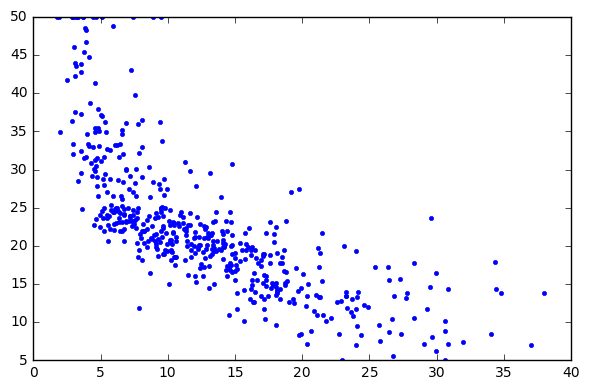

In [2]:
plt.plot(df["percent_lower_status"], df["median_value"], '.')
plt.tight_layout()
plt.show()

# Data Preparation (train, test)

In [3]:
from numpy import loadtxt, zeros, ones, array, linspace, logspace

#Create a mask for selecting randomly 20% of data
msk = np.random.rand(len(df)) < 0.2

df_test = df[msk].copy()
df = df[~msk].copy()

# Manual Implementation

## Algorithm

In [4]:
def cost(theta , X, y):
    m = y.size
    predictions = X.dot(theta).flatten()
    sqErrors = (predictions - y) ** 2
    J = (1.0 / (2 * m)) * sqErrors.sum()
    return J

def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = zeros(shape=(num_iters, 1))
    
    last_cost = cost(theta, X, y)
    
    for i in range(num_iters):
        predictions = X.dot(theta).flatten()
        errors_x1 = (predictions - y) * X[:, 0]
        errors_x2 = (predictions - y) * X[:, 1]        
        theta[0][0] = theta[0][0] - alpha * (1.0 / m) * errors_x1.sum()
        theta[1][0] = theta[1][0] - alpha * (1.0 / m) * errors_x2.sum()            
        cost = cost(theta, X, y)
        if cost > last_cost:
            print("\tfound lowest cost before end of iterations")
            print("\titeration: " + str(i))
            print("\tbefore:" + str(last_cost))
            print("\tnow:" + str(cost))
            break
        J_history[i, 0] = cost
    return theta, J_history

## Experiment
Let's try some different values for the number of iterations and the alpha value.

In [6]:
from IPython.display import HTML, display
theta = {}
theta["ar"] = {}
theta["pls"] = {}
J_history = {}
J_history["ar"] = {}
J_history["pls"] = {}

alphas = ["0.001", "0.005", "0.01"]
iterations = ["100", "1000", "10000", "100000"]

table = '<table>'

for alpha in alphas:
    table += '<tr>'
    for iteration in iterations:
        if not iteration in theta["ar"]:
            theta["ar"][iteration] = {}
            J_history["ar"][iteration] = {}
        theta["ar"][iteration][alpha] = zeros(shape=(2, 1))
        theta["ar"][iteration][alpha], J_history["ar"][iteration][alpha] = gradient_descent(X_ar, y, theta["ar"][iteration][alpha], float(alpha), int(iteration))
        table += "<td>ar-" + str(iteration) + "-" + str(alpha) + " : y = " + str(theta["ar"][iteration][alpha][0]) + " + " + str(theta["ar"][iteration][alpha][1]) + "*X</td>"    
        print('.', end='')
    table += '</tr>'
    print('-')

for alpha in alphas:
    table += '<tr>'
    for iteration in iterations:
        if not iteration in theta["pls"]:
            theta["pls"][iteration] = {}
            J_history["pls"][iteration] = {}
        theta["pls"][iteration][alpha] = zeros(shape=(2, 1))        
        theta["pls"][iteration][alpha], J_history["pls"][iteration][alpha] = gradient_descent(X_pls, y, theta["pls"][iteration][alpha], float(alpha), int(iteration))
        table += "<td>ar-" + str(iteration) + "-" + str(alpha) + " : y = " + str(theta["pls"][iteration][alpha][0]) + " + " + str(theta["pls"][iteration][alpha][1]) + "*X</td>"   
        print('.', end='')
    table += '</tr>'
    print('-')
    
table += '</table>'

display(HTML(table))

....-
....-
....-
....-
....-
	found lowest cost before end of iterations
	iteration: 0
	before:291.45286259541956
	now:316.1766715494497
.	found lowest cost before end of iterations
	iteration: 0
	before:291.45286259541956
	now:316.1766715494497
.	found lowest cost before end of iterations
	iteration: 0
	before:291.45286259541956
	now:316.1766715494497
.	found lowest cost before end of iterations
	iteration: 0
	before:291.45286259541956
	now:316.1766715494497
.-


ar-100-0.001 : y = [ 0.50727844] + [ 3.48576622]*X,ar-1000-0.001 : y = [ 0.15967623] + [ 3.59527724]*X,ar-10000-0.001 : y = [-3.22056929] + [ 4.12671563]*X,ar-100000-0.001 : y = [-24.02319632] + [ 7.39728118]*X
ar-100-0.005 : y = [ 0.35704307] + [ 3.56424745]*X,ar-1000-0.005 : y = [-1.38239362] + [ 3.83771973]*X,ar-10000-0.005 : y = [-14.90324264] + [ 5.96345235]*X,ar-100000-0.005 : y = [-36.95375825] + [ 9.43020954]*X
ar-100-0.01 : y = [ 0.15965754] + [ 3.59528018]*X,ar-1000-0.01 : y = [-3.22073933] + [ 4.12674236]*X,ar-10000-0.01 : y = [-24.02385404] + [ 7.39738459]*X,ar-100000-0.01 : y = [-37.14539247] + [ 9.46033806]*X
ar-100-0.001 : y = [ 0.86768886] + [ 1.080632]*X,ar-1000-0.001 : y = [ 7.27293466] + [ 0.69244542]*X,ar-10000-0.001 : y = [ 31.12187005] + [-0.75290688]*X,ar-100000-0.001 : y = [ 34.36728748] + [-0.94959371]*X
ar-100-0.005 : y = [ 3.88447206] + [ 0.89780143]*X,ar-1000-0.005 : y = [ 23.8226049] + [-0.31053872]*X,ar-10000-0.005 : y = [ 34.36702877] + [-0.94957803]*X,ar-100000-0.005 : y = [ 34.36728748] + [-0.94959371]*X
ar-100-0.01 : y = [ 0.22392621] + [ 2.35570957]*X,ar-1000-0.01 : y = [ 0.22392621] + [ 2.35570957]*X,ar-10000-0.01 : y = [ 0.22392621] + [ 2.35570957]*X,ar-100000-0.01 : y = [ 0.22392621] + [ 2.35570957]*X


## Analysis of parameters

The influence of different values for the number of iterations and alpha are clear to see.

For example:
- The alpha of 0.01 is already to high as a step, so the cost of the first iteration is already higher, than the default theta
    - if the algorithm would not break for this, the costs would grow on
- For the anti correlation a negative beta is only reached for #iterations > 1000 (ca. 5000 is needed)

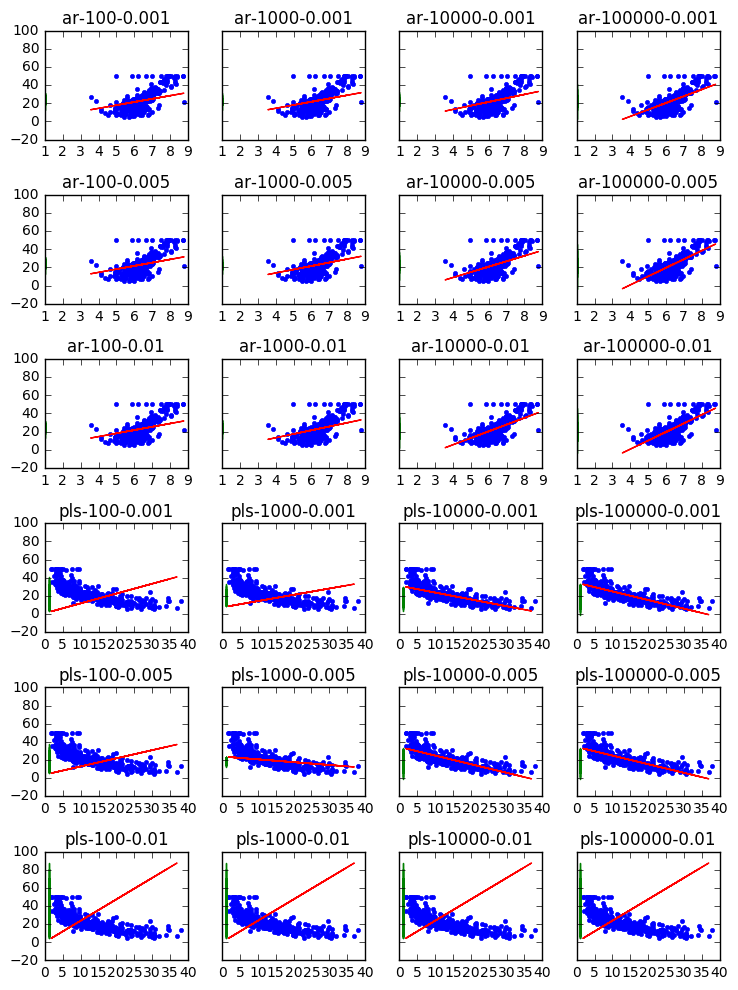

In [7]:
plt.close('all')
f, axarr = plt.subplots(len(alphas)*2, len(iterations), sharey=True)
f.set_size_inches(7.5,10)


i = 0
j = 0
for alpha in alphas:
    for iteration in iterations:
        result_ar = X_ar.dot(theta["ar"][iteration][alpha]).flatten()
        axarr[i, j].plot(df["avg_rooms"], df["median_value"], '.')
        axarr[i, j].plot(X_ar, result_ar)
        axarr[i, j].set_title("ar-" + iteration + "-" + alpha)
        j+=1
    i+=1
    j= 0
    
for alpha in alphas:
    for iteration in iterations:
        result_pls = X_pls.dot(theta["pls"][iteration][alpha]).flatten()
        axarr[i, j].plot(df["percent_lower_status"], df["median_value"], '.')
        axarr[i, j].plot(X_pls, result_pls)
        axarr[i, j].set_title("pls-" + iteration + "-" + alpha)
        j+=1
    i+=1
    j= 0
    
plt.tight_layout()
plt.show()

## Analysis of Convergence

How fast did we reach the area of optimal theta values with the different combinations of parameters?

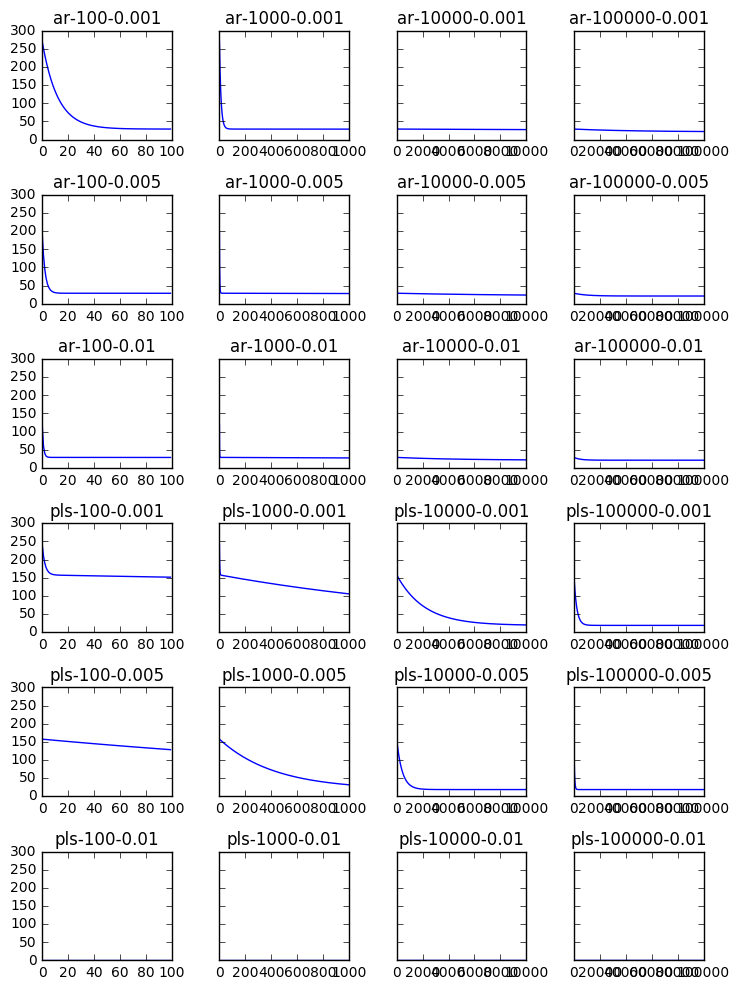

In [8]:
from numpy import arange

plt.close('all')
f, axarr = plt.subplots(len(alphas)*2, len(iterations), sharey=True)
f.set_size_inches(7.5,10)

i = 0
j = 0
for alpha in alphas:
    for iteration in iterations:
        axarr[i, j].plot(arange(int(iteration)), J_history["ar"][iteration][alpha])
        axarr[i, j].set_title("ar-" + iteration + "-" + alpha)
        j+=1
    i+=1
    j= 0

for alpha in alphas:
    for iteration in iterations:
        axarr[i, j].plot(arange(int(iteration)), J_history["pls"][iteration][alpha])
        axarr[i, j].set_title("pls-" + iteration + "-" + alpha)
        j+=1
    i+=1
    j= 0

plt.tight_layout()
plt.show()

# Library Implementations

## Statsmodel


Intercept a0, Coefficient a1:  34.3226665575 -0.946402472101
P-Value a0, a1:  1.74658732805e-192 2.47851055885e-72
R-Squared a0:  0.547898839696
Conf. Interval a0, a1:                                0          1
Intercept             33.109013  35.536320
percent_lower_status  -1.030069  -0.862736

(2,)
(410, 2)
(410, 1)


ValueError: Shape of passed values is (410, 410), indices imply (1, 410)

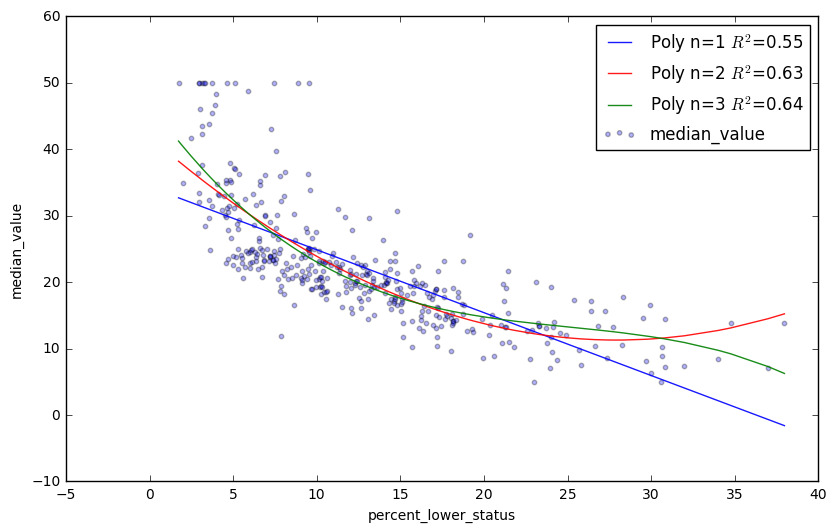

In [50]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

df_sorted = df.sort_values(by='percent_lower_status')

plt.figure(figsize=(6 * 1.618, 6))
plt.scatter(df_sorted.percent_lower_status, df_sorted.median_value, s=10, alpha=0.3)
plt.xlabel('percent_lower_status')
plt.ylabel('median_value')

# create a linear model and fit it to the data
model_first = smf.ols(formula='median_value ~ 1 + percent_lower_status', data=df_sorted).fit()
plt.plot(df_sorted.percent_lower_status, model_first.predict(df_sorted), 'b-', label='Poly n=1 $R^2$=%.2f' % model_first.rsquared, 
         alpha=0.9)

model_second = smf.ols(formula='median_value ~ 1 + percent_lower_status + I(percent_lower_status ** 2.0)', data=df_sorted).fit()
plt.plot(df_sorted.percent_lower_status, model_second.predict(df_sorted), 'r-', label='Poly n=2 $R^2$=%.2f' % model_second.rsquared, 
         alpha=0.9)

model_third = smf.ols(formula='median_value ~ 1 + percent_lower_status + I(percent_lower_status ** 2.0) + I(percent_lower_status ** 3.0)', data=df_sorted).fit()
plt.plot(df_sorted.percent_lower_status, model_third.predict(df_sorted), 'g-', label='Poly n=3 $R^2$=%.2f' % model_third.rsquared, 
         alpha=0.9)

plt.legend()

print()
print('Intercept a0, Coefficient a1: ', model_first.params[0], model_first.params[1]) 
print('P-Value a0, a1: ', model_first.pvalues[0], model_first.pvalues[1])
print('R-Squared a0: ', model_first.rsquared)
print('Conf. Interval a0, a1: ', model_first.conf_int())

print('')
# calculate MAE, MSE, RMSE
y_pred = model_first.predict(df)
n = df[['median_value']].size 
X = df[['percent_lower_status']]
it = ones(shape=(n, len(list(X))+1 ) )
it[:, 1:] = X
X = it
print(model_first.params.shape)
print(X.shape)
print(df[['median_value']].shape)
print(cost(model_first.params, X, df[['median_value']]))
print('MAE: ', metrics.mean_absolute_error(df[['median_value']], y_pred))
print('MSE: ', metrics.mean_squared_error(df[['median_value']], y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(df[['median_value']], y_pred)))

#plt.close('all')
#f, axarr = plt.subplots(1, 2, sharey=True)
#f.set_size_inches(5,2.5)

#axarr[0].plot(df["avg_rooms"], df["median_value"], '.')
#axarr[0].plot(X_ar_1, fit.predict(X_ar_1))
#axarr[1].plot(df["avg_rooms"], df["median_value"], '.')
#axarr[1].plot(X_test_ar_1, y_pred)

#plt.tight_layout()
#plt.show()

Intercept a0:  34.3672874801
Coefficients a1, a2:  x1   -0.949594
dtype: float64
P-Values:  const    2.862542e-184
x1        6.013700e-69
dtype: float64
R-Squared:  0.545526675961
Conf. Interval:                 0          1
const  33.123499  35.611076
x1     -1.035770  -0.863417

MAE:  4.7245689762
MSE:  43.6868369675
RMSE:  6.60960187663


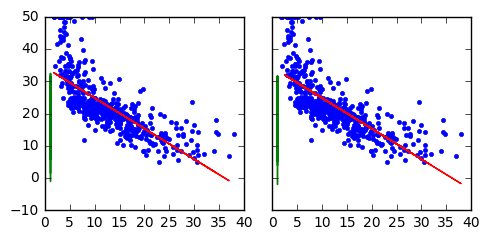

In [11]:
import statsmodels.api as sm

# create a linear model and fit it to the data
X_pls_1 = sm.add_constant(X_pls)
model = sm.OLS(y,X_pls_1)
fit = model.fit()

print('Intercept a0: ', fit.params[0])
print('Coefficients a1, a2: ', fit.params[1:3])
print('P-Values: ', fit.pvalues)
print('R-Squared: ', fit.rsquared)
print('Conf. Interval: ', fit.conf_int())

print('')
# calculate MAE, MSE, RMSE
X_test_pls_1 = sm.add_constant(X_pls_test)
y_pred = fit.predict(X_test_pls_1)
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.close('all')
f, axarr = plt.subplots(1, 2, sharey=True)
f.set_size_inches(5,2.5)

axarr[0].plot(df["percent_lower_status"], df["median_value"], '.')
axarr[0].plot(X_pls_1, fit.predict(X_pls_1))
axarr[1].plot(df["percent_lower_status"], df["median_value"], '.')
axarr[1].plot(X_test_pls_1, y_pred)

plt.tight_layout()
plt.show()

## SKLearn

/home/apospiech/Programme/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Coefficients a1, a2:  [ 0.          9.46049273]
Intercept a0:  -37.1463762792
R-Squared:  0.500151235468
MAE:  4.37294472399
MSE:  47.1607007916
RMSE:  6.86736490887


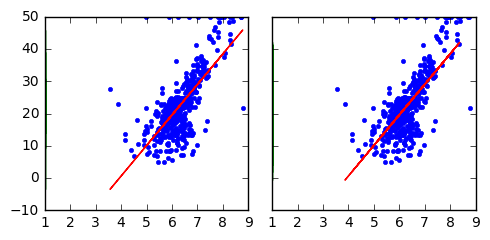

In [12]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

ols = LinearRegression(fit_intercept=True)

model = ols.fit(X_ar, y)

print('Coefficients a1, a2: ', model.coef_)
print('Intercept a0: ', model.intercept_)
print('R-Squared: ',model.score(X_ar_test, y_test))

# calculate MAE, MSE, RMSE
y_pred = model.predict(X_ar_test)
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.close('all')
f, axarr = plt.subplots(1, 2, sharey=True)
f.set_size_inches(5,2.5)

axarr[0].plot(df["avg_rooms"], df["median_value"], '.')
axarr[0].plot(X_ar_1, model.predict(X_ar_1))
axarr[1].plot(df["avg_rooms"], df["median_value"], '.')
axarr[1].plot(X_test_ar_1, y_pred)

plt.tight_layout()
plt.show()

Coefficients a1, a2:  [ 0.         -0.94959371]
Intercept a0:  34.3672874801
R-Squared:  0.536970165456
MAE:  4.7245689762
MSE:  43.6868369675
RMSE:  6.60960187663


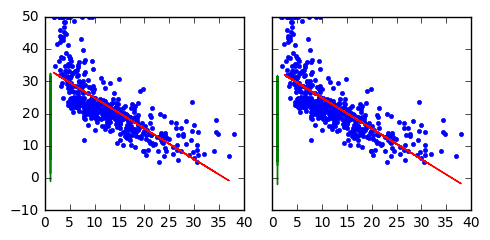

In [13]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

ols = LinearRegression(fit_intercept=True)

model = ols.fit(X_pls, y)

print('Coefficients a1, a2: ', model.coef_)
print('Intercept a0: ', model.intercept_)
print('R-Squared: ',model.score(X_pls_test, y_test))


# calculate MAE, MSE, RMSE
y_pred = model.predict(X_pls_test)
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.close('all')
f, axarr = plt.subplots(1, 2, sharey=True)
f.set_size_inches(5,2.5)

axarr[0].plot(df["percent_lower_status"], df["median_value"], '.')
axarr[0].plot(X_pls_1, model.predict(X_pls_1))
axarr[1].plot(df["percent_lower_status"], df["median_value"], '.')
axarr[1].plot(X_test_pls_1, y_pred)

plt.tight_layout()
plt.show()

## SciPy

Intercept a0:  9.4604927295
Coefficients a1, a2:  -37.1463762792
R-Squared:  0.689668668419
MAE:  4.37294472399
MSE:  47.1607007916
RMSE:  6.86736490887


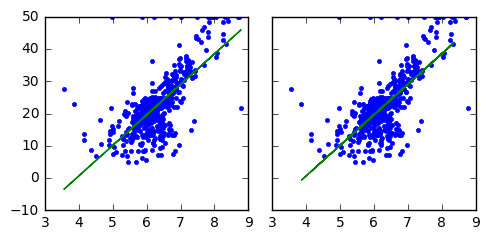

In [14]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(X_ar[:,1], y)

print('Intercept a0: ', slope)
print('Coefficients a1, a2: ', intercept)
print('R-Squared: ',r_value)

# calculate MAE, MSE, RMSE
y_pred = intercept + (slope*X_ar_test[:,1])
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.close('all')
f, axarr = plt.subplots(1, 2, sharey=True)
f.set_size_inches(5,2.5)

axarr[0].plot(df["avg_rooms"], df["median_value"], '.')
axarr[0].plot(X_ar_1[:,1], intercept + (slope*X_ar[:,1]))
axarr[1].plot(df["avg_rooms"], df["median_value"], '.')
axarr[1].plot(X_ar_test[:,1], y_pred)

plt.tight_layout()
plt.show()

Coefficients a1, a2:  34.3672874801
Intercept a0:  -0.949593708385
R-Squared:  -0.738597776845
MAE:  4.7245689762
MSE:  43.6868369675
RMSE:  6.60960187663


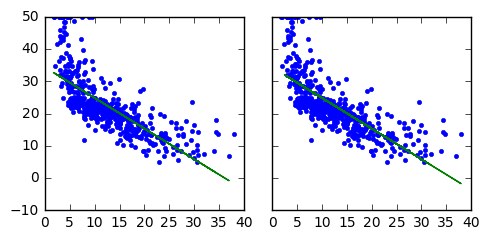

In [15]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(X_pls[:,1], y)

print('Coefficients a1, a2: ', intercept)
print('Intercept a0: ', slope)
print('R-Squared: ',r_value)

# calculate MAE, MSE, RMSE
y_pred = intercept + (slope*X_pls_test[:,1])
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

plt.close('all')
f, axarr = plt.subplots(1, 2, sharey=True)
f.set_size_inches(5,2.5)

axarr[0].plot(df["percent_lower_status"], df["median_value"], '.')
axarr[0].plot(X_pls_1[:,1], intercept + (slope*X_pls[:,1]))
axarr[1].plot(df["percent_lower_status"], df["median_value"], '.')
axarr[1].plot(X_pls_test[:,1], y_pred)

plt.tight_layout()
plt.show()

# Sources:

## Overviews:

http://wiki.fast.ai/index.php/Linear_Regression

http://www.holehouse.org/mlclass/01_02_Introduction_regression_analysis_and_gr.html

http://www.holehouse.org/mlclass/04_Linear_Regression_with_multiple_variables.html

https://www.cs.cmu.edu/~ninamf/courses/601sp15/lectures.shtml

## Notebooks:

https://nbviewer.jupyter.org/github/nborwankar/LearnDataScience/blob/master/notebooks/A1.%20Linear%20Regression%20-%20Overview.ipynb

https://github.com/masinoa/machine_learning/blob/master/02_Linear_Regression.ipynb

https://nbviewer.jupyter.org/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.06-Linear-Regression.ipynb

https://nbviewer.jupyter.org/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/ml/ML-Exercise1.ipynb

http://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

https://nbviewer.jupyter.org/urls/s3.amazonaws.com/datarobotblog/notebooks/ordinary_least_squares_in_python.ipynb

https://nbviewer.jupyter.org/urls/s3.amazonaws.com/datarobotblog/notebooks/multiple_regression_in_python.ipynb

https://nbviewer.jupyter.org/url/www.cs.toronto.edu/~frossard/post/linear_regression/Linear%20Regression.ipynb
with additional explanations here https://www.cs.toronto.edu/~frossard/post/linear_regression/

## Algorithms
https://github.com/rushter/MLAlgorithms/blob/master/mla/linear_models.py

### Spark
https://databricks.com/product/getting-started-guide/machine-learning

### Spark Streaming
https://spark.apache.org/docs/2.1.0/mllib-linear-methods.html#streaming-linear-regression

### Flink
https://github.com/apache/flink/blob/master/flink-examples/flink-examples-batch/src/main/scala/org/apache/flink/examples/scala/ml/LinearRegression.scala

https://ci.apache.org/projects/flink/flink-docs-release-1.2/dev/libs/ml/multiple_linear_regression.html